In [15]:
# imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.preprocessing import Imputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

In [16]:
# function to convert col names to lowercase
def clean_cols(cols):
    return [col.lower() for col in cols]

In [17]:
# Read data
file_path = "/Users/nitishkumar/pokemon_classification/datasets/Pokemon.csv"

df = pd.read_csv(file_path)
df.columns = clean_cols(df.columns)
df.head()

,pokedex no.,name,type,other type,hp,attack,defense,special attack,special defense,speed,total,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,0
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,0
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,0


In [19]:
# Looking at the class imbalance
df.groupby('legendary').size()

legendary
0    918
1    127
dtype: int64

In [20]:
# Looking at data types
df.dtypes

pokedex no.         int64
name               object
type               object
other type         object
hp                  int64
attack              int64
defense             int64
special attack      int64
special defense     int64
speed               int64
total               int64
generation          int64
legendary           int64
dtype: object

In [22]:
df.describe()

,pokedex no.,hp,attack,defense,special attack,special defense,speed,total,generation,legendary
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,440.769378,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656,439.314833,4.059330,0.121531
std,262.517231,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094,121.970701,2.264232,0.326900
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,0.000000
25%,212.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,2.000000,0.000000
50%,436.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,458.000000,4.000000,0.000000
75%,670.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,6.000000,0.000000
max,898.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,1125.000000,8.000000,1.000000


In [51]:
attribute = 'total'

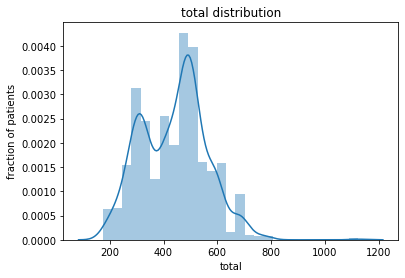

In [52]:
# Look at distribution of total rating
sns.distplot(df[attribute].dropna())
plt.title(f'{attribute} distribution')
plt.ylabel('fraction of patients')
plt.show()

/Users/nitishkumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


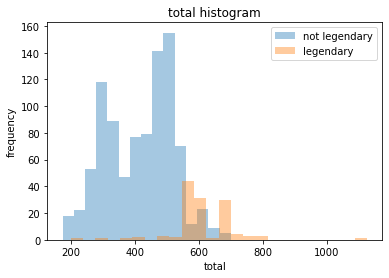

In [53]:
data_notleg = df.loc[df['legendary']==0]
data_leg = df.loc[df['legendary']==1]
sns.distplot(data_notleg[attribute].dropna(),kde=False,label='not legendary')
sns.distplot(data_leg[attribute].dropna(),kde=False,label='legendary')
plt.legend()
plt.title(f'{attribute} histogram')
plt.ylabel('frequency')
plt.show()

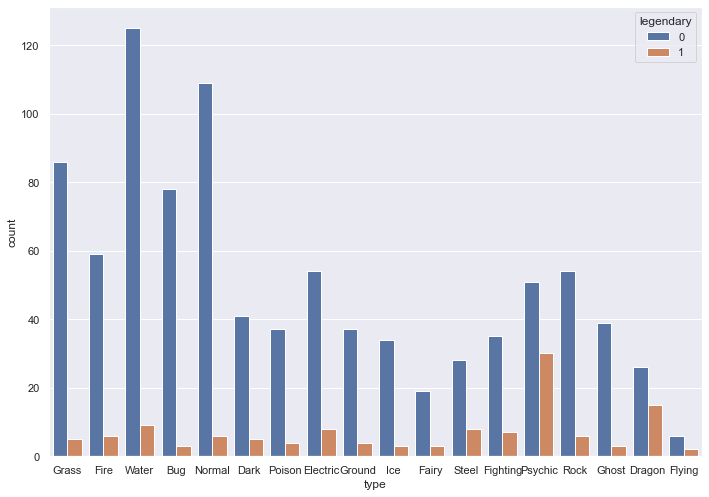

<Figure size 640x480 with 0 Axes>

In [57]:
from matplotlib.pyplot import figure

sns.countplot(x='type',hue='legendary',data=df)
figure(figsize=(8, 6), dpi=80)
plt.show()

/Users/nitishkumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


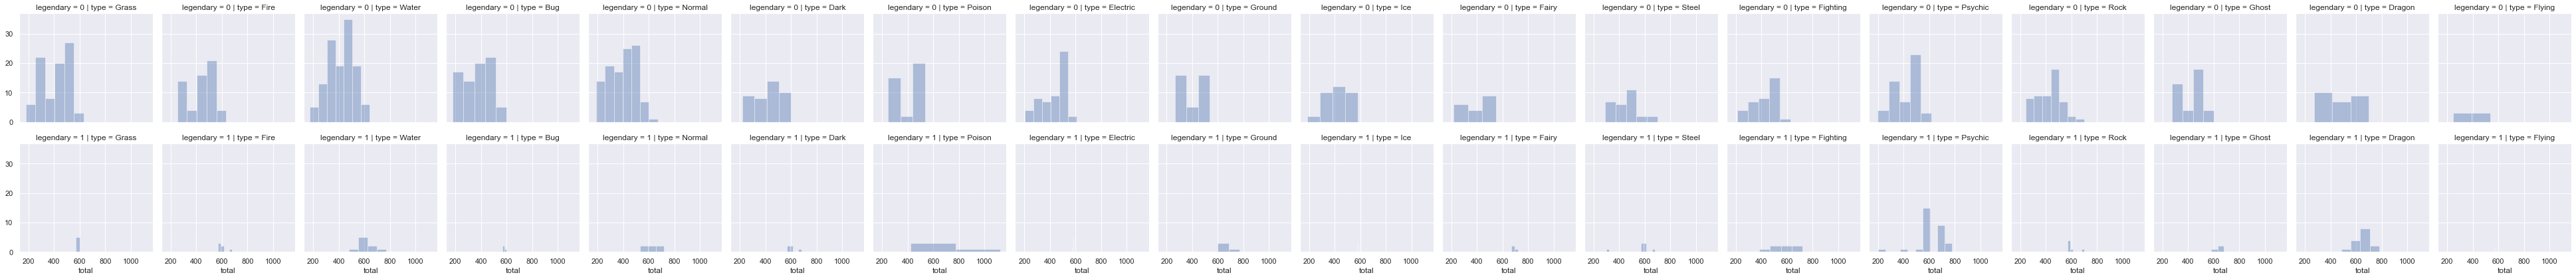

In [58]:
g = sns.FacetGrid(data=df, row='legendary', col='type')
g.map(sns.distplot, attribute,kde=False)
plt.show()

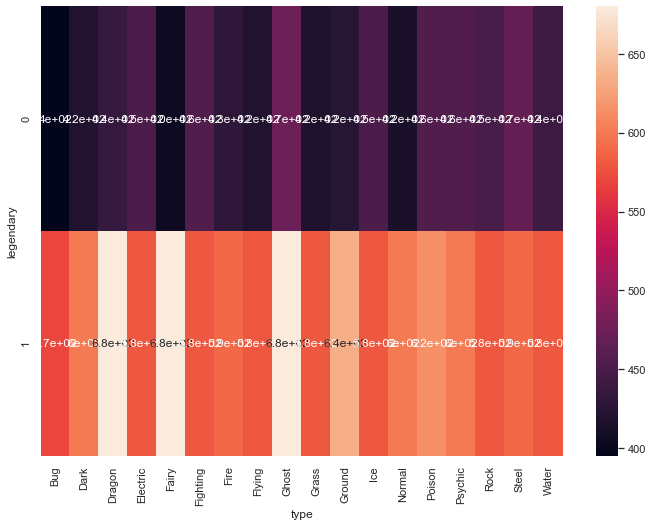

<Figure size 800x320 with 0 Axes>

In [62]:
sns.heatmap(df.pivot_table(index='legendary',columns='type',values=attribute,aggfunc=np.median),annot=True)

plt.show()

<AxesSubplot:>

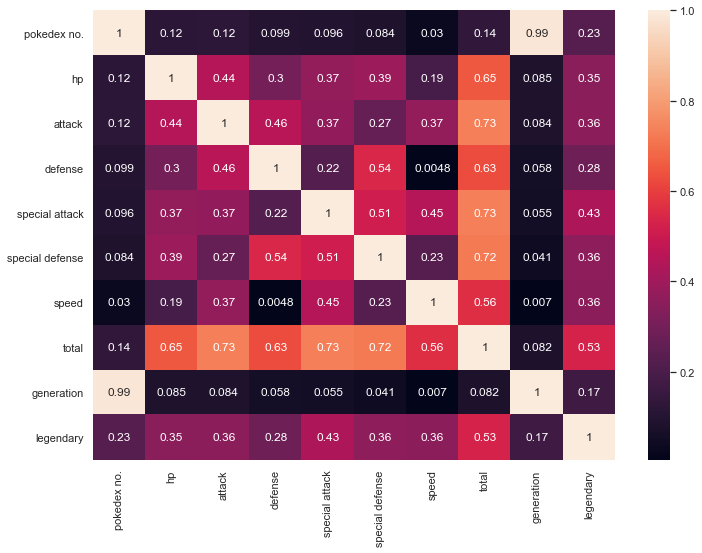

In [67]:
sns.heatmap(df.corr(),annot=True)